In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('50_Startups.csv')

In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
y = df[['Profit']]

In [10]:
x1 = df[['R&D Spend']]

In [11]:
x2 = df[['R&D Spend','Marketing Spend']]

In [12]:
x3 = df[['R&D Spend','Marketing Spend','Administration']]

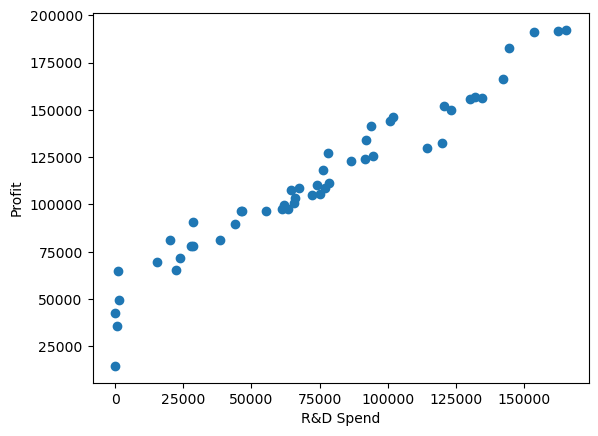

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x1["R&D Spend"],y)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x1,y)

LinearRegression()

In [15]:
y_pred = LR.predict(x1)

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean squarred error:",mse.round(3))
print("Root Mean squarred error:",np.sqrt(mse).round(3))

Mean squarred error: 85120931.327
Root Mean squarred error: 9226.101


In [17]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x2,y)

LinearRegression()

In [18]:
y_pred = LR.predict(x2)

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean squarred error:",mse.round(3))
print("Root Mean squarred error:",np.sqrt(mse).round(3))

Mean squarred error: 78887897.006
Root Mean squarred error: 8881.886


In [20]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x3,y)

LinearRegression()

In [21]:
y_pred = LR.predict(x3)

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean squarred error:",mse.round(3))
print("Root Mean squarred error:",np.sqrt(mse).round(3))

Mean squarred error: 78417126.019
Root Mean squarred error: 8855.344


In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x1,y)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("R square:",r2.round(2))

R square: 0.95


In [25]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x2,y)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("R square:",r2.round(2))

R square: 0.95


In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x3,y)

LinearRegression()

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("R square:",r2.round(2))

R square: 0.95


In [29]:
import statsmodels.formula.api as smf
model = smf.ols('y~x1+x2+x3', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        11:00:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.2686      0.015     17.846      0.000       0.238       0.299
x2[0]          0.2686      0.015     17.846      0.000       0.238       0.299
x2[1]          0.0136      0.008      1.655      0.105      -0.003       0.030
x3[0]          0.2686      0.015     17.846      0.000       0.238       0.299
x3[1]          0.0136      0.008      1.655      0.105      -0.003       0.030
x3[2]         -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     2.14e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
# multicollinearity
Y = df[['Profit']]

In [31]:
X1 = df[["R&D Spend",]]

In [32]:
X2 = df[["R&D Spend","Marketing Spend"]]

In [33]:
X3 = df[["Marketing Spend","Administration"]]

In [34]:
X4 = df[["R&D Spend","Marketing Spend","Administration"]]

In [35]:
import statsmodels.formula.api as smf  
model = smf.ols('Y~X1', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           3.50e-32
Time:                        11:00:31   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
X1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
import statsmodels.formula.api as smf
model = smf.ols('y~X1',data=df).fit()
model.summary()

model.rsquared

VIF = 1 / (1 - model.rsquared)
print("VIF:",VIF)

VIF: 18.703935508241834


In [37]:
import statsmodels.formula.api as smf  
model = smf.ols('Y~X2', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           2.16e-31
Time:                        11:00:31   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
X2[0]          0.7966      0.041     19.266      0.000       0.713       0.880
X2[1]          0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
import statsmodels.formula.api as smf
model = smf.ols('y~X2',data=df).fit()
model.summary()

model.rsquared

VIF = 1 / (1 - model.rsquared)
print("VIF:",VIF)

VIF: 20.18175753641973


In [39]:
import statsmodels.formula.api as smf  
model = smf.ols('Y~X3', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           2.50e-10
Time:                        11:00:31   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
X3[0]          0.2488      0.030      8.281      0.000       0.188       0.309
X3[1]          0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
import statsmodels.formula.api as smf
model = smf.ols('y~X3',data=df).fit()
model.summary()

model.rsquared

VIF = 1 / (1 - model.rsquared)
print("VIF:",VIF)

VIF: 2.562282520147202


In [41]:
import statsmodels.formula.api as smf  
model = smf.ols('Y~X4', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        11:00:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
X4[0]          0.8057      0.045     17.846      0.000       0.715       0.897
X4[1]          0.0272      0.016      1.655      0.105      -0.006       0.060
X4[2]         -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
import statsmodels.formula.api as smf
model = smf.ols('y~X4',data=df).fit()
model.summary()

model.rsquared

VIF = 1 / (1 - model.rsquared)
print("VIF:",VIF)

VIF: 20.30291711474573


In [44]:
# residual analysis
# preparing a model
# build a full model
import statsmodels.formula.api as smf
model = smf.ols('Profit~X4', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        11:02:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
X4[0]          0.8057      0.045     17.846      0.000       0.715       0.897
X4[1]          0.0272      0.016      1.655      0.105      -0.006       0.060
X4[2]         -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

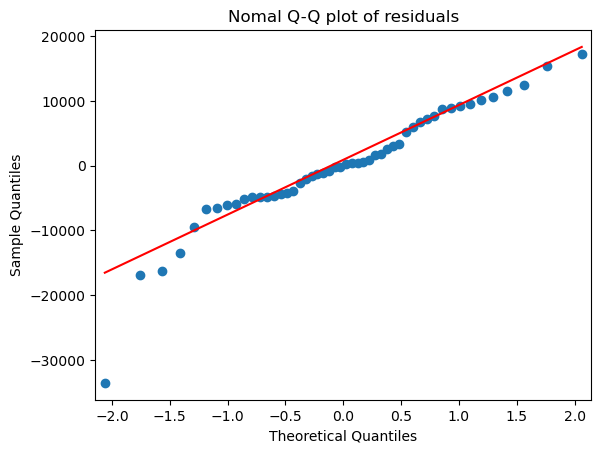

In [45]:
#risidual analysis
#test for normality of risiduals (Q-Q plot)
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Nomal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

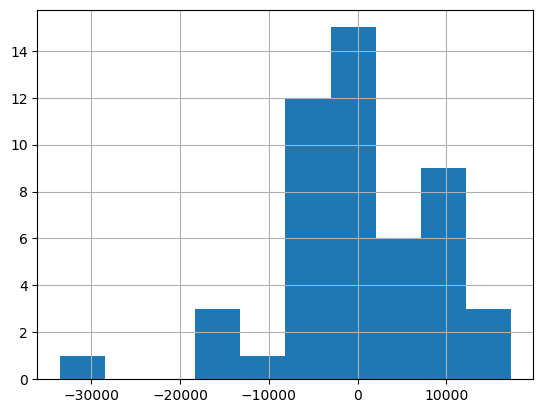

In [46]:
model.resid.hist()

In [47]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [48]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

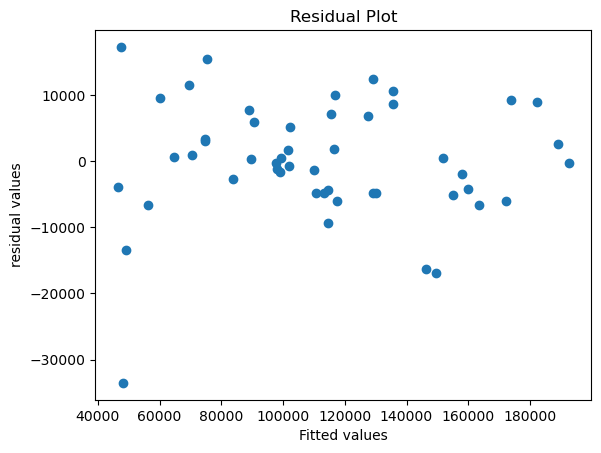

In [49]:
# no pattern no issue
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('residual values')
plt.show()

In [50]:
# model deletiondiagnostics
# detecting influencers and outliers
mode_influence = model.get_influence()

In [51]:
mode_influence

In [52]:
(cooks, pvalue) = mode_influence.cooks_distance

In [53]:
cooks

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [54]:
cooks =pd.DataFrame(cooks)
cooks[0].describe()

count    50.000000
mean      0.022891
std       0.049837
min       0.000009
25%       0.001373
50%       0.004441
75%       0.020875
max       0.288082
Name: 0, dtype: float64

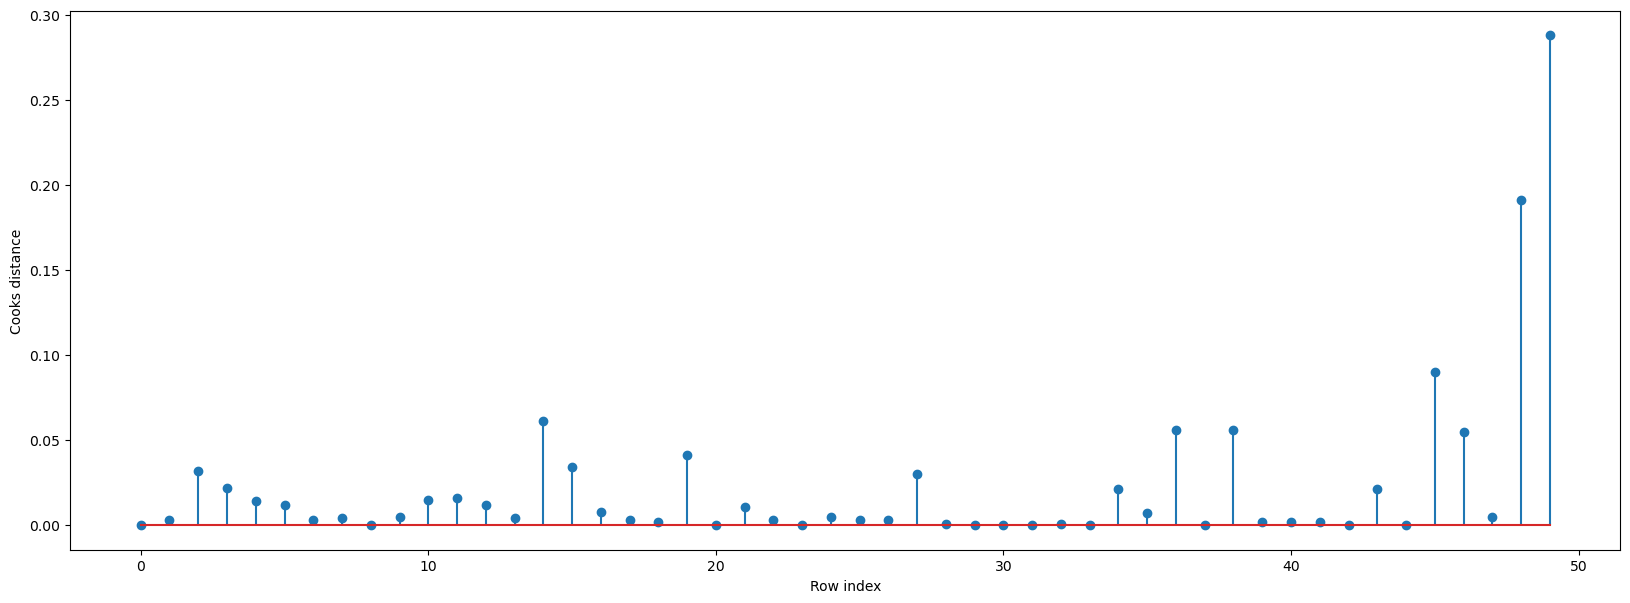

In [55]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)),np.round(cooks[0], 3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [57]:
cooks[0][cooks[0]>0.5]

Series([], Name: 0, dtype: float64)

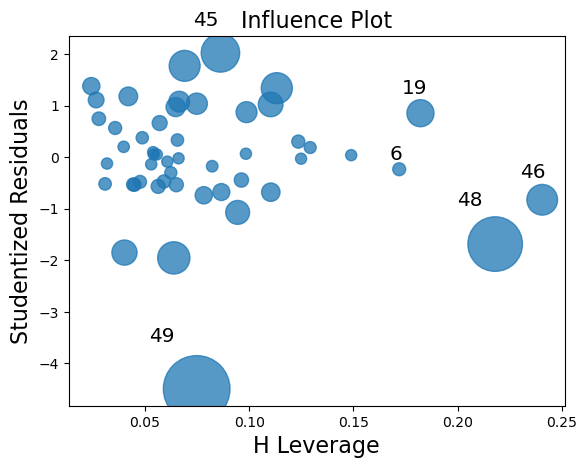

In [58]:
 ## high influence points 
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [59]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1/n))
leverage_cutoff

15.059999999999999